In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 

import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from warnings import filterwarnings
filterwarnings('ignore')
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/diabetes/diabetes.csv


In [2]:
data = pd.read_csv("/kaggle/input/diabetes/diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
Pregnancies                 2000 non-null int64
Glucose                     2000 non-null int64
BloodPressure               2000 non-null int64
SkinThickness               2000 non-null int64
Insulin                     2000 non-null int64
BMI                         2000 non-null float64
DiabetesPedigreeFunction    2000 non-null float64
Age                         2000 non-null int64
Outcome                     2000 non-null int64
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [5]:
data.nunique()   #Unique degerler

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                53
Insulin                     182
BMI                         247
DiabetesPedigreeFunction    505
Age                          52
Outcome                       2
dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [7]:
print("satir ve sutun = ", data.shape)
print("Boyut sayisi = ",data.ndim)
print("eleman sayisi = ",data.size)    # neden farkli bilmiyorum? 

satir ve sutun =  (2000, 9)
Boyut sayisi =  2
eleman sayisi =  18000


In [8]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


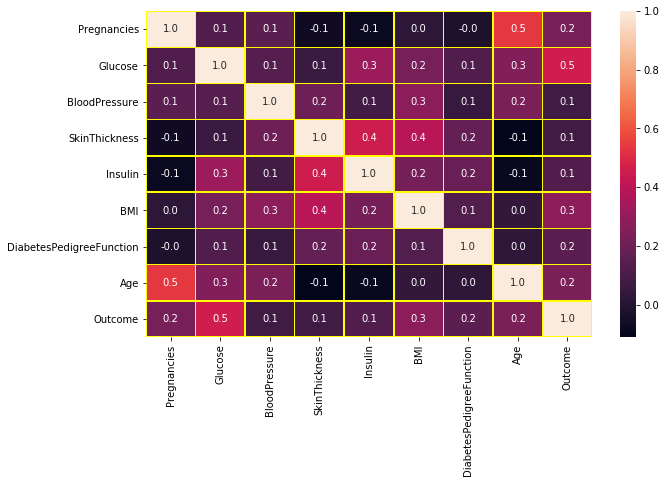

In [9]:
# Heatmap correlation cizimi
data.corr()

#correlation map
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
f,ax = plt.subplots(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, linewidths=0.5,linecolor="yellow", fmt= '.1f',ax=ax) #ftm noktadan sonra kac hane olacak onu verir
plt.show()

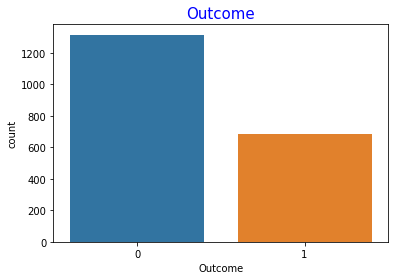

In [10]:
#kac adet 1 ve 0 var

sns.countplot(data.Outcome)
#sns.countplot(kill.manner_of_death)
plt.title("Outcome",color = 'blue',fontsize=15)
plt.show()

In [11]:
data.isnull().sum()   # eksik gozlem var mi? 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

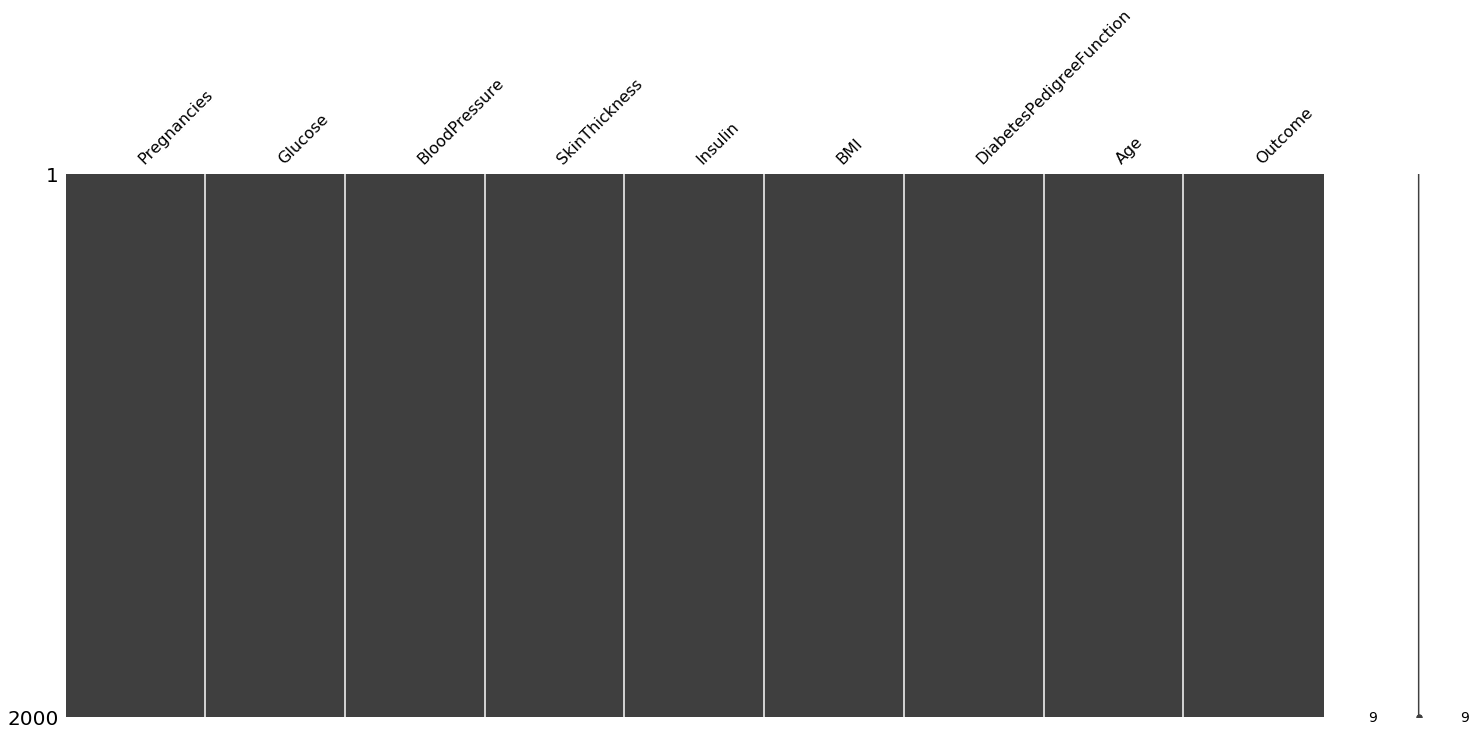

In [12]:
import missingno as msno
msno.matrix(data)
plt.show()

In [13]:
x = data.drop(["Outcome"], axis=1)  #"Outcome" disindaki sutunlar bagimsiz degisken_
y = data["Outcome"]                 #"Outcome" ise bagimli degiskendir,   

In [14]:
#x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [15]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00


In [16]:
# Test Train 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

# 1) Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
loj_reg = LogisticRegression(penalty='l1').fit(x_train,y_train)
loj_reg

#Not penalty= default olursa skor dusuyor.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
#?loj_reg

In [19]:
print("b0 = ",loj_reg.intercept_)   # b0 yani sabit degerimizi aldik
print("Coefs = ",loj_reg.coef_)        # bagimsiz degiskenlerin katsayi degerlerini aldik

b0 =  [-7.78554731]
Coefs =  [[ 0.1209703   0.03282942 -0.01086875  0.00583638 -0.00167707  0.07700117
   0.62856461  0.01372917]]


In [20]:
y_pred = loj_reg.predict(x_test)     # model uzerinden tahmin etme yaptik

In [21]:
loj_reg.predict_proba(x_train)[0:10]  #ikili cikti uretir, 0 ve 1 oranlarini verir.

# sadece 1 ve sifir olarak donmesini degilde, bunlarin olasilik degerlerini ogrenmek istedik.

array([[0.19125366, 0.80874634],
       [0.92924803, 0.07075197],
       [0.98167369, 0.01832631],
       [0.6037684 , 0.3962316 ],
       [0.64481911, 0.35518089],
       [0.61667602, 0.38332398],
       [0.26335776, 0.73664224],
       [0.75945705, 0.24054295],
       [0.90851683, 0.09148317],
       [0.79121937, 0.20878063]])

In [22]:
log_score = accuracy_score(y_test, y_pred)
print("Logistic_reg_class_SCORE = ",log_score)       
# modeldeki gercek 0-1 ile tahmindeki 0-1 oranlarini karsilastirip, dogru siniflandirma oranimizdir.

Logistic_reg_class_SCORE =  0.7925


 # 2) Random Forest
*  Temeli birden cok karar agacinin urettigi tahminlerin bir araya getirilerek degerlendirilmesine dayanir. Gozlemlerde ve degiskenlerde rastsallik saglar, 

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf_model = RandomForestClassifier(n_estimators=22).fit(x_train, y_train)
rf_model

#n_estimators=10 defaultur. 22 da daha yuksek skor aldim

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=22,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

n_estimators=10 >> fit edilecek agac sayisidir, yani 10 adet agac tahmini olusturulacak,
max_features='auto'> > Bolunme islemlerinde goz onunde bulundurulacak olan maximum degisken sayisini verir,
min_samples_split=2 > > Bu bir node bolunmeden once minimum gozlem sayisini ifade eder,
min_samples_leaf=1 > > leaf node ' taki minimum gozlem sayisini ifade eder,

In [25]:
y_pred = rf_model.predict(x_test)
rf_score = accuracy_score(y_test, y_pred)
print("random_forest_class_SCORE = ",rf_score)       
# modeldeki gercek 0-1 ile tahmindeki 0-1 oranlarini karsilastirip, dogru siniflandirma oranimizdir.

random_forest_class_SCORE =  0.98


Text(0.5, 0, 'Değişken Önem Düzeyleri')

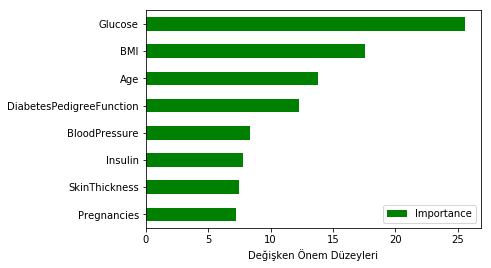

In [26]:
Importance = pd.DataFrame({"Importance": rf_model.feature_importances_*100},
                         index = x_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "g")

plt.xlabel("Değişken Önem Düzeyleri")

 # 3)KNN Model
 Tahminler gozlem benzerligine gore yapilir

k = komsu sayisini belirler
Bilinmeyen noktalar ile diger tum noktalar arasindaki mesafeyi hesaplar
belirlenen k ile kendisine en yakin k kadar gozlemi secer.

In [27]:
knn = KNeighborsClassifier( n_neighbors=4).fit(x_train, y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [28]:
y_pred = knn.predict(x_test)
knn_score = accuracy_score(y_test, y_pred)
print("KNN_class_SCORE = ", knn_score)       
# modeldeki gercek 0-1 ile tahmindeki 0-1 oranlarini karsilastirip, dogru siniflandirma oranimizdir.

KNN_class_SCORE =  0.815


In [29]:
y_probs = knn.predict_proba(x_test)     # tekrardan 0 ve 1'in olasilik degerlerini bu degiskene atadik.
y_probs = y_probs[:,1] 
y_pred = [1 if i > 0.75 else 0 for i in y_probs] 


# if ve for donguleri ile "1" in 0.5'den buyukse 1 diye siniflandirmasini, degilse "0" diye siniflandirmasini istedik. 
# ..ve tekrar y_pred seklinde yeni tahminlerimizi atadik


In [30]:
y_pred = [1 if i > 0.75 else 0 for i in y_probs] 

In [31]:
accuracy_score(y_test, y_pred)    # degistirilen diagnosisden sonraki skorumuz

0.8125

# 4) SVM - Support Vector Model

Amac, iki sinif arasrindaki ayrimin optimum olmasini saglayacak hiper-duzlemi bulmaktir.

yani 1 ve 0 arasindaki mesafenin maximum tutmaya calisir. ayrimin belirgin olmasini saglamaya calisir.

In [32]:
svm_model = SVC(C=5, degree=7, kernel='linear' ).fit(x_train, y_train)
svm_model

# C=5, degree=7, kernel='linear'yaptim. def degil

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=7, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [33]:
y_pred = svm_model.predict(x_test)
svm_score = accuracy_score(y_test, y_pred)
print("SVM_class_SCORE = ", svm_score)       
# modeldeki gercek 0-1 ile tahmindeki 0-1 oranlarini karsilastirip, dogru siniflandirma oranimizdir.

SVM_class_SCORE =  0.7825


# 5) Gaussian Naive Bayes Model
Olasilik temelli bir modelleme teknigidir. Amac belirli bir ornegin her bir sinifa ait olma olasiliginin kosullu olasilik temelli hesaplanmasidir. Cok sinifli degiskenlerde bu model daha iyi sonuclar verebilir. cok daha fazla katogorik degisken varsa kullanilmasi uygun olabilir

In [34]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_model = nb.fit(x_train, y_train)
nb_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
nb_model.predict(x_test)[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [36]:
nb_model.predict_proba(x_test)[0:10]  

# ! Tahmini olasilik degerleridir. Ilk sutun "0", ikinci sutun "1" i ifade eder.

array([[0.07117587, 0.92882413],
       [0.98180744, 0.01819256],
       [0.04796433, 0.95203567],
       [0.50573733, 0.49426267],
       [0.32329619, 0.67670381],
       [0.39255525, 0.60744475],
       [0.50998442, 0.49001558],
       [0.88900801, 0.11099199],
       [0.93641466, 0.06358534],
       [0.77473681, 0.22526319]])

In [37]:
y_pred = nb_model.predict(x_test)
nb_score = accuracy_score(y_test, y_pred)
print("NB_class_SCORE = ", nb_score)       
# modeldeki gercek 0-1 ile tahmindeki 0-1 oranlarini karsilastirip, dogru siniflandirma oranimizdir.

NB_class_SCORE =  0.7775


In [38]:
cross_val_score(nb_model, x_test, y_test, cv = 20).mean()  

#Dogrulanmis test hatamiz, 20 katmanli cross valide edilmis test hatasi ortalamasidir.

0.7649310776942355

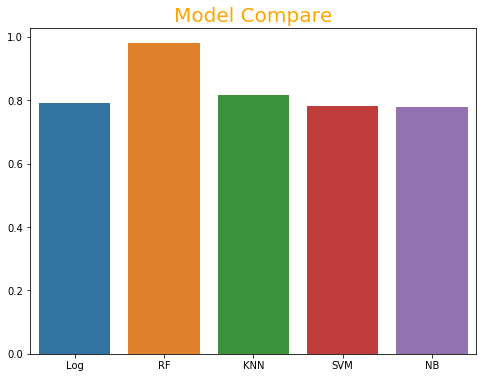

In [39]:
# Model Skorlarinin  Seaborn ile gorsellestirilmesi

indexx = ["Log","RF","KNN","SVM","NB"]
regressions = [log_score,rf_score,knn_score,svm_score,nb_score]

plt.figure(figsize=(8,6))
sns.barplot(x=indexx,y=regressions)
plt.xticks()
plt.title('Model Compare',color = 'orange',fontsize=20)
plt.show()

En yuksek skoru veren model random foresttir

In [40]:
## conda install -c plotly plotly chart-studio

In [41]:
from plotly.plotly import iplot
import plotly.graph_objs as go
import chart_studio.plotly as py


indexx = ["Log","RF","KNN","SVM","NB"]
regressions = [log_score,rf_score,knn_score,svm_score,nb_score]
# creating trace1
trace1 =go.Scatter(
                    x = indexx,
                    y = regressions,
                    mode = "lines+markers+text",
                    name = "#",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= indexx) #uzerine geldiginde ne gorunsun.

data = [trace1]  # olusturdugumuz veriler listeye atadik

# konumlandirmayi yapar ve isimlendirir.(layout)
layout = dict(title = 'Model Compare',
              xaxis= dict(title= 'Models',ticklen= 15,zeroline= True),
              yaxis= dict(title= 'Scores',ticklen= 15,zeroline= True)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 
